In [4]:
%pylab inline
from scipy import stats
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


# Tiny Review

## Notation for Classification Problems

- $\omega$: class
- $p(\omega, x)$: joint distribution defining the classification problem
- $D=\{(\omega_1, x_1),...\}$: i.i.d. sample from $p$
- $\arg\max_\omega P(\omega | x)$: optimal zero-one loss function classifier
- $\hat{\theta}$: a maximum likelihood estimate


## Bayes Rule 

$$ P( \omega | x ) = \frac{ p(x | \omega) P(\omega) } { p(x) } $$

- $P(\omega | x)$ posterior distribution at input $x$
- $p(x | \omega)$ class conditional density ("generative model")
- $p(x)$ sample distribution or "evidence"
- $P(\omega)$ prior class probabilities


# Maximum Likelihood Estimation



## Neural Networks and Maximum Likelihood Estimation

A DNN is ultimate a parameterized function $f_\theta(x)$, with $\theta\in\mathbb{R}^{1000...}$.

We're training the DNN on some random training sample $D$ drawn according to some joint distribution $p(y, x)$, and we try to maximize $\theta$ so that the model matches the dataset best under some loss function.

## "One Parameter Generative Network"

Let's drop all the complexity of classification etc. and just focus on parameter estimation. Let's use a one-parameter model:

$$p_\theta(x) = (2\pi)^{-1/2} e^{-\frac{(x-\theta)^2}{2}}$$

Our training set $D$ consists of $N$ samples from $p_\theta(x)$ and we need to find $\theta$.

You might call this a "one parameter generative network".

## Maximum Likelihood Estimate

How do we find $\theta$? You already know a formula for finding $\theta$:

$$ \hat{\theta} = \frac{1}{N} \sum_{x\in D} x $$

This is the _maximum likelihood estimate_ of $\theta$.

Let's derive this.

## Univariate Normal Density

For the univariate normal density, $\theta = (\mu,\sigma)$, but we assume $\sigma=1$ is known. We write:

$$p(x|\theta) = p_\theta(x) = (2\pi)^{-1/2} e^{-\frac{(x-\theta)^2}{2}}$$

## Univariate Normal Density (2)

Now we can write a density for the entire dataset:

$$ p(D|\theta) = p(x_1,\ldots,x_n|\theta) $$
$$ = p(x_1|\theta)\cdot\ldots\cdot p(x_n|\theta)$$
$$ = \prod_{i=1}^n p(x_i|\theta)$$

We call this the _likelihood_ of the data.

Note that likelihoods are parameterized densities viewed as functions of the parameters.

## Maximum Likelihood Estimate

The _maximum likelihood estimate_ is given by:

$$\hat{\theta} = \arg\max_\theta ~ p(D|\theta)$$

This seems like a reasonable thing to do: choose the parameter that was
most likely to produce the data set.

## Maximum Likelihood Instability

However, in general, there is little reason why the maximum of the likelihood function
should mean anything.

For example, we can easily modify the likelihood function to put a tiny spike in it
that moves the maximum somewhere arbitrary without actually changing the problem much at all.

For bimodal densities, the Maximum Likelihood solution can jump between the two peaks with tiny changes in the data.

## Maximum Likelihood Estimation of the Mean of a Normal Density

Let's derive the ML estimator explicitly.

We're trying to maximize:

$$p(D|\theta) = \prod_i (2\pi)^{-1/2} e^{-\frac{(x_i-\theta)^2}{2}}$$

Let's take logarithms

$$l(\mu) = \sum_i \log p(x_i|\theta) = \hbox{const} - {1\over 2} (x_i-\theta)\cdot(x_i-\theta)$$

## Maximizing the Likelihood

If $l$ is sufficiently well behaved (it is), then a necessary condition for a local maximum is that the gradient in the parameter to be estimated is 0. The gradient is:

$$\nabla_\theta l(\theta) = \nabla_\theta(\hbox{const} - {1\over 2} (x_i-\theta)\cdot(x_i-\theta)) = \sum_i (x_i-\theta)$$

$$ \nabla_\theta l(\theta)= \sum_i (x_i-\theta) = 0 \Rightarrow \sum_i x_i = n \theta $$

$$ \hat{\theta} = \frac{1}{n}\sum x_i $$

Therefore: the arithmetic mean is the maximum likelihood estimator for the parameter of the normal density with known variance.

## Connection to Classification

Let's say you have a classification problem in which you know that both classes are distributed according to $p_\theta(x)$ for two different parameters, $\theta_1$ and $\theta_2$.

Recipe for classification:
- compute $\theta_1$ and $\theta_2$ from the training samples
- apply Bayes formula to derive $P(\omega | x; \theta_1, \theta_2)$ using the parametric densities

Other recipe:
- write down $P(\omega | x; \theta_1, \theta_2)$
- use gradient descent to optimize training set error

# Bayesian vs Maximum Likelihood

Let's say that the $\theta$ are the parameters of a DNN classifier $P_\theta(\omega|x)$. In typical DL, we estimate a single parameter vector $\hat{\theta}$ and use that for classification:

$$\hat{\theta} = \arg\max_\theta p(D | \theta)$$

In Bayesian methods, we average out our classifications over all possible parameter vectors:

$$P(\omega | x) \propto \int P_\theta(\omega | x) p(\theta | D) d\theta$$

In [38]:
# parameter estimate for nornmal density, unknown mean, sigma=1

def p_x_theta(x, theta, sigma=1):
    return exp(-(x-theta)**2/(2*sigma**2))/sqrt(2*pi*sigma**2)
def p_theta_D(theta, D):
    return prod([p_x_theta(x, theta) for x in D], axis=0)

D = [0.7, 3.3]

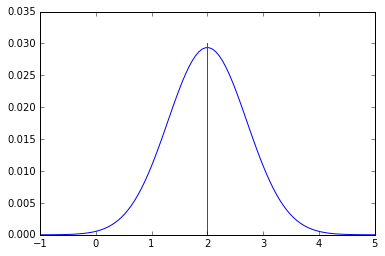

In [45]:
# plot
xs = linspace(-2, 6, 1000)
thetas = linspace(-1, 5, 100)
# p(theta|D)
plot(thetas, p_theta_D(thetas, D), color="blue")
# arg max p(theta|D)... or mean(D)
plot([mean(D)]*2, [0, 0.03], color="red")

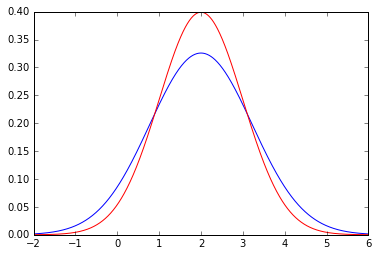

In [46]:
# p(x|D) using Bayesian vs ML

def bayesian_integral(x, D):
    thetas = linspace(-5, 10, 1000)
    return sum(p_x_theta(x, thetas) * p_theta_D(thetas, D)) / sum(p_theta_D(thetas, D)) 

ps = [(x, bayesian_integral(x, D)) for x in xs]

ps = array(ps); plot(ps[:,0], ps[:,1])
plot(xs, p_x_theta(xs, mean(D)), color="red")

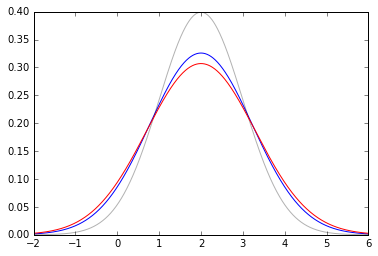

In [44]:
# overparameterizing the distribution
plot(ps[:,0], ps[:,1])
plot(xs, p_x_theta(xs, mean(D)), color="black", alpha=0.3)
plot(xs, p_x_theta(xs, mean(D), var(D)**.5), color="red")

## Maximum Likelihood vs Bayesian Estimates

The Bayesian estimate $p(x|D)$ usually is quite different from the ML estimate $p(x|\hat{\theta}(D))$. It often doesn't even have the same form.

ML estimates tend to be "overtrained" / underestimate variance. Bayesian estimates can never be "overtrained".

Using an overparameterization accidentally can compensate for this to some degree (that probably makes DNNs work better).

# Maximum A-Posteriori Estimate

## Maximum A Posteriori Estimate

By analogy to Bayesian methods, we can also ``multiply in'' a prior:

$$\hat{\theta} = \arg\max_\theta ~ p(D|\theta) p(\theta)$$

This is called the _maximum a-posterior estimate_ (MAP) for the parameter $\theta$.

## MAP vs Bayesian Methods

Although MAP looks like the derivation may have involved _Bayes rule_, it is
not a Bayesian method at all.
Bayesian methods are *not* methods that involve Bayes rule somewhere.

**Bayesian methods are methods that result in decisions that minimize expected loss.**

**Bayesian methods are NOT methods that happen to use Bayes rule somewhere.**

# Summary

We know how to do classification / estimation optimally and correctly: Bayesian methods.

Why aren't we using them with DNNs? Because they are computationally prohibitive.

However, several methods attempt to approximate Bayesian solutions:
- dropout methods
- ensemble methods
- some forms of variational methods

# Uniform Distribution Example

Bayesian vs Maximum Likelihood Example
==============================

Let's apply this to another, simple example and compare maximum likelihood and bayesian approaches
~
Assume that the samples $x$ come from a uniform density over the interval $[0,\theta]$

$$p(x|\theta) = U(x;0,\theta) = 1/\theta \cdot \lfloor x\in[0,\theta]\rfloor$$

We also assume a prior

$$p(\theta) = U(\theta;0,10)$$

That is, $\theta$ is distributed uniformly over the interval $[0,10]$

Let's assume we see a sequence of training examples $D = \\{4,7,2\\}$

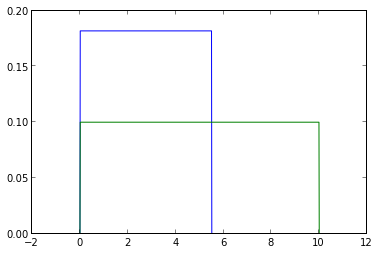

In [225]:
xs = linspace(-1,11,1000)
mus = xs
C = (amax(xs)-amin(xs))/len(xs)
def pxt(x,mu): return (xs>=0)*(x<=mu)*1.0/maximum(mu,1e-6)
plot(xs,pxt(xs,5.5))
pmu = (xs>=0)*(xs<=10)*0.1
plot(xs,pt)

Now assume we draw the sample $x_1=4$.  How should we update our estimate?

$$p(\mu|x) = \frac{p(x|\mu) p(\mu)}{p(x)}$$

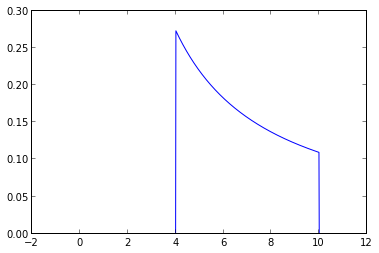

In [228]:
pmu1 = pxt(4,mus)*pmu
pmu1 /= C*sum(pmu1)
plot(xs,pmu1)

The maximum likelihood estimate is clearly at $\mu=4$.  If we now plug this
into $p(x|\mu)$ we get...

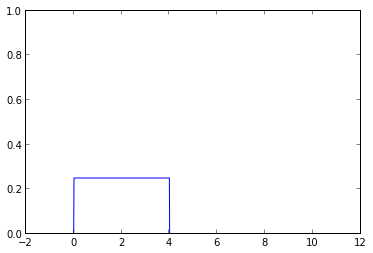

In [229]:
ylim(0,1)
plot(xs,pxt(xs,4))

This is odd because it predicts that only values between 0 and 4 can occur.
But the training sample $x_1=4$ only excludes that $\mu\lt4$; it doesn't 
exclude any values greater than $4$.

What's the Bayesian estimate?

$$p(x|D) = \int p(x|\theta) p(\theta|D) d\theta \propto \int_0^{10} 1/\theta \cdot \lfloor x\in[0,\theta]\rfloor \cdot 1/\theta \cdot \lfloor \theta\in[4,10]\rfloor d\theta
= \int_{x_1}^{10} 1/\theta^2 \cdot \lfloor x\in[0,\theta]\rfloor d\theta$$

You can either think about it, or we can simply perform this integral numerically.

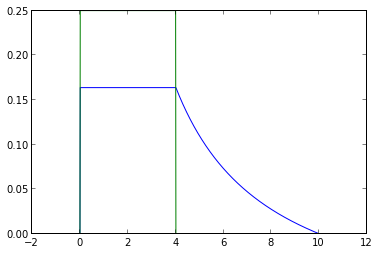

In [230]:
result = zeros(xs.shape)
for i,mu in enumerate(mus):
    weight = pmu1[i]
    result += weight * pxt(xs,mu)
result /= C*sum(result)
plot(xs,result)
plot(xs,pxt(xs,4))

Now assume we get another sample, $x_1=7$

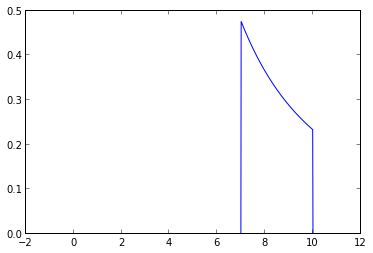

In [236]:
pmu2 = pxt(7,mus)*pmu1
pmu2 /= C*sum(pmu2)
plot(xs,pmu2)

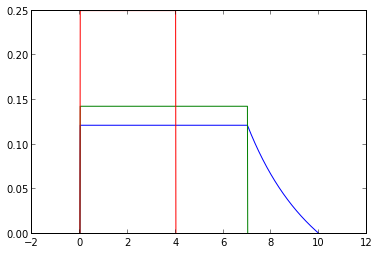

In [237]:
result = zeros(xs.shape)
for i,mu in enumerate(mus):
    weight = pmu2[i]
    result += weight * pxt(xs,mu)
result /= C*sum(result)
plot(xs,result)
plot(xs,pxt(xs,7))
plot(xs,pxt(xs,4))

This is even weirder.  After seeing the first sample, the maximum likelihood
estimator predicts only values between 0 and 4 occurring, but after seeing
another training sample, it is changing its mind and now predicts that values
between 0 and 7 can occur.

The Bayesian estimator, in contrast, "knows" that the parameter must be greater than 7,
so it predicts a uniform distribution for the interval [0...7] and then a tradeoff
between the parameter distribution and the uniform distribution of the parameters.

The last sample illustrates this further.

A sample of $x_3=2$ doesn't cause any update to the maximum likelihood estimator,
but it does cause an update to posterior distribution.

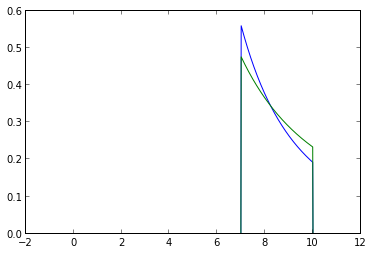

In [238]:
pmu3 = pxt(2,mus)*pmu2
pmu3 /= C*sum(pmu3)
plot(xs,pmu3)
plot(xs,pmu2)

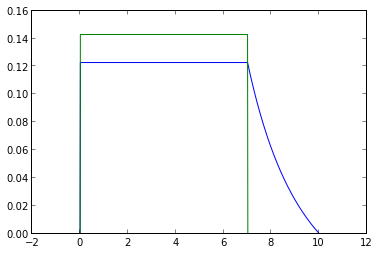

In [239]:
result = zeros(xs.shape)
total = 0
for i,mu in enumerate(mus):
    weight = pmu3[i]
    result += weight * pxt(xs,mu)
    total += weight
result /= total
plot(xs,result)
plot(xs,pxt(xs,7))

In fact, if we repeat the same process with a lot of samples (in this case
the true parameter is 7), we see that the Bayesian parameter estimate
becomes an increasingly peaked distribution close to the true value.

I.e., if, out of 100 samples, we haven't seen a value greater than 7,
then the probability that the mean is significantly greater than 7 must
be very small.

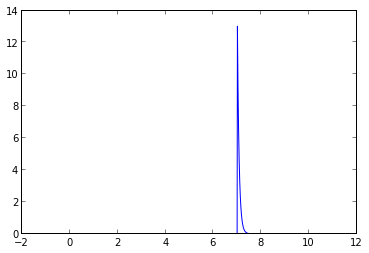

In [240]:
p = pmu.copy()
for i in range(100):
    p = pxt(rand()*7,mus)*p
    p /= C*sum(p)
plot(mus,p)

Loss Functions for Parameter Estimation
========================================

Consider $p(\theta|x)$ from the previous example again.

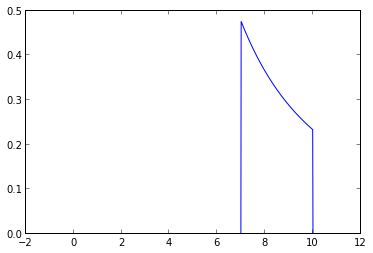

In [241]:
plot(mus,pmu2)

Assume now that we are supposed to return a "best estimate" of the parameter.

By itself, that isn't sufficient.

But now assume that we are given a loss function: if our estimate is with in $\pm 0.5$ of the true value,
we don't need to pay a penalty, otherwise, we need to pay a penalty of 1.  What value should we return?

The most likely value is 7, but no values less than 7 can occur.

Therefore, it is better to return 7.5.  That way, not only do we have the most likely value, but we also
get all the probability mass between 7 and 8 as well and our expected loss is about half of what it would be
if we had returned 7.

Now assume we are penalized if we are outside the range $\pm 1$ from the true value.
By the same reasoning, our parameter estimate should now be 8.

As you can see from this simple example, there is not "best" answer to the parameter estimation
problem; our answer depends on the loss function.

But we can see that for any symmetric loss function, the value 7 (the maximum likelihood estimate)
is never the optimal answer.